In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import glob
import os
os.chdir("/Volumes/WorkDrive/gimmeSAD/replicates/")

## The values of K and c we're testing
K = ["1000", "5000"]
C = ["0.01", "0.05"]

## This value dictates how many species to downsample the data to so that
## we're comparing the same size datasets across iterations/replicates/param settings.
num_species = 30
## Number of bins for the pi x dxy 2d histogram
heat_size = 10

In [252]:
pis = []
def make_heatmaps(rowlist):

    pis = [x[num_species+4:2*num_species+4] for x in rowlist]
    dxys = [x[2*num_species+4:3*num_species+4] for x in rowlist]
    max_pi = np.max(pis)
    mean_pi = np.mean(pis)
    std_pi = np.std(pis)
    max_dxy = np.max(dxys)
    mean_dxy = np.mean(dxys)
    std_dxy = np.std(dxys)
    max_pi = mean_pi + 2*std_pi
    max_dxy = mean_dxy + 2*std_dxy
    print("using max_pi", max_pi)
    print("using max_dxy", max_dxy)

    heats = []
    ## Make the bins
    pi_bins = np.linspace(0, max_pi, heat_size)
    pi_island_bins = np.linspace(0, max_dxy, heat_size)
    
    for p, d in zip(pis, dxys):
        #print(row, len(row))
        heat = np.zeros((heat_size, heat_size), dtype=np.int)

        pis = zip(p, d)
        ## Set a reasonable default
        #max_pi = max_pi_island = 0.1
        #if pis.any():
            #max_pi = max([x[0] for x in pis])
            #max_pi_island = max([x[1] for x in pis])
            #print(max_pi, max_pi_island)


        ## Now you have the bins each value belongs in, but you need to 
        ## go through and populate the heat matrix
        for pi, pi_island in pis:
            count_pi = 0
            count_pi_island = 0
            try:
                while not pi <= pi_bins[count_pi]:
                    count_pi += 1
                while not pi_island <= pi_island_bins[count_pi_island]:
                    count_pi_island += 1
                ## increment the heatmap point this corresponds to
                heat[count_pi][count_pi_island] += 1
            except:
                heat[heat_size-1][heat_size-1] += 1
        heats.append(heat)
        
    heat_dat = []
    ## Flatten all the 2d histograms
    for h in heats:
        heat_dat.append([item for sublist in h for item in sublist])

    return heat_dat


In [312]:
df

,step,K,C,nspecies,abundance_0,abundance_1,abundance_2,abundance_3,abundance_4,abundance_5,...,heat_91,heat_92,heat_93,heat_94,heat_95,heat_96,heat_97,heat_98,heat_99,is_train
0,100000,1000,0.01,36,832,435,523,22,70,648,...,0,0,0,0,0,0,0,1,0,True
1,200000,1000,0.01,38,832,66,618,228,1478,1033,...,0,0,0,0,0,0,0,0,5,False
2,300000,1000,0.01,38,832,833,1474,66,228,1478,...,0,0,0,0,0,0,0,0,1,True
3,400000,1000,0.01,35,256,66,1285,70,583,1416,...,0,0,0,0,0,0,0,0,5,True
4,500000,1000,0.01,39,256,130,779,68,886,1478,...,0,0,0,0,0,0,0,2,3,False
5,600000,1000,0.01,48,779,1554,535,1560,285,292,...,0,0,0,0,0,0,0,0,1,True
6,700000,1000,0.01,38,0,224,130,1478,1226,523,...,0,0,0,0,0,0,0,0,4,False
7,800000,1000,0.01,39,66,451,5,649,1226,1634,...,0,0,0,0,0,0,0,0,1,True
8,900000,1000,0.01,36,5,1478,243,520,649,1354,...,0,0,0,0,0,0,0,0,3,False
9,1000000,1000,0.01,44,5,520,527,1552,1554,1561,...,0,0,0,0,0,0,0,0,2,True


## Load the data into a dataframe.

The dataframe will end up looking like this:

    step     K     C   nspecies  abundance_0  abundance_1  abundance_2  
    100000  1000  0.01       36          832          435          523   
    abundance_3  abundance_4  abundance_5   ...      dxy_20   dxy_21  dxy_22  
    22           70          648            ...    0.012125  0.01125  0.0075   
    dxy_23   dxy_24  dxy_25    dxy_26  dxy_27  dxy_28  dxy_29  
    0.018125  0.02175  0.0135  0.014075  0.0125   0.003  0.0065  

Columns (assuming `num_species = 30`):
 * 0 - Step
 * 1 - K
 * 2 - c
 * 3 - nspecies total
 * 4:34 - abundances
 * 34:64 - pi
 * 64:94 - dxy
 * 94:194 - 2x frequency histogram (for 10x10)
 
The general formula for `num_species = n`, and `heat_size = m`:
 * 4:(n+4)  abundances
 * n+4:2*n+4 = pi
 * 2*n+4:3*n+4 = dxy
 * 3*n+4:3*n+m*m+4 = 2d histogram bins
 
This is currently really specific to the format of pi_x_dxy.log

Also, the value of nspecies here is the total number of species in the abundance distribution.
The abundance, pi, and dxy vectors will be truncated down to `num_species` value so
data is comparable across runs.

__NB:__ Truncation is currently stupid as possible, just taking the first x number.
It should be smarter and randomly sample w/o replacement based on abundance.

In [272]:
## Create the column names
abund_idx = ["abundance_{}".format(x) for x in xrange(0,num_species)]
pis_idx = ["pi_{}".format(x) for x in xrange(0,num_species)]
dxy_idx = ["dxy_{}".format(x) for x in xrange(0,num_species)]
heat_idx = ["heat_{}".format(x) for x in xrange(0,heat_size*heat_size)]

rowlist = []
for k in K:
    for c in C:
        dirs = glob.glob("K_{}-C_{}*".format(k, c))
        #print("n {} - {}".format(dirs, len(dirs)))
        
        for d in dirs:
            with open(os.path.join(d, "pi_x_dxy.log")) as infile:
                lines = infile.readlines()
                for line in lines:
                    if "step" in line:
                        try:
                            sumstats = eval(line.split(" - ")[1])
                        except:
                            continue
                        if len(sumstats) >= num_species:
                            step = line.split(" - ")[0].split()[1]
                            wat = [step, k, c, str(len(sumstats.keys()))] + sumstats.keys()[:num_species] + [float(x[0]) for x in sumstats.values()][:num_species]\
                                        + [float(x[1]) for x in sumstats.values()][:num_species]
                            rowlist.append(wat)
                            
dat = pd.DataFrame(rowlist, columns=["step", "K", "C", "nspecies"] + abund_idx + pis_idx + dxy_idx) 

heats = make_heatmaps(rowlist)
heats_df = pd.DataFrame(heats, columns=heat_idx)
dat = pd.concat([dat, heats_df], axis=1)

('using max_pi', 0.034780872784023184)
('using max_dxy', 0.046721040251905405)


In [273]:
## Check out the data
print("nrows - {}".format(len(dat)))
print(dat[:1])
print(len(dat))

nrows - 3343
     step     K     C nspecies  abundance_0  abundance_1  abundance_2  \
0  100000  1000  0.01       36          832          435          523   

   abundance_3  abundance_4  abundance_5   ...     heat_90  heat_91  heat_92  \
0           22           70          648   ...           0        0        0   

   heat_93  heat_94  heat_95  heat_96  heat_97  heat_98  heat_99  
0        0        0        0        0        0        1        0  

[1 rows x 194 columns]
3343


## Train RF to classify just one of the model params

preds   0.01  0.05
actual            
0.01     371    46
0.05     107   320


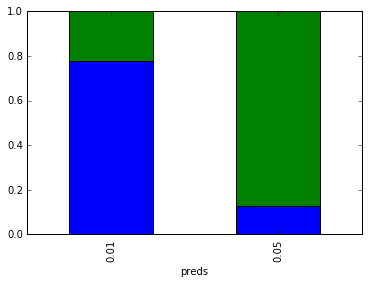

In [277]:
df = dat
k_or_c = "C"

## Make training and testing datasets
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
train, test = df[df['is_train']==True], df[df['is_train']==False]

## cols 4:34 are abundances
## Cols 34:94 are pi
## cols 64:94 are dxy
## cols 94:194 are 2d hist
features = df.columns[94:194]

# If you want to use 2d histogram and pretend you know the SAD as data
#features = features.union(df.columns[3:34])

clf = RandomForestClassifier(n_jobs=2)
y, _ = pd.factorize(train[k_or_c])
clf.fit(train[features], y)

ks = pd.factorize(df[k_or_c])
preds = ks[1][clf.predict(test[features])]
dat_pis = pd.crosstab(test[k_or_c], preds, rownames=['actual'], colnames=['preds'])
print(dat_pis)
# Normalize the bins
labels = set(test[k_or_c])
for lab in labels:
    dat_pis[lab] = dat_pis[lab]/np.sum(dat_pis[lab])

dat_pis.T.plot.bar(stacked=True, legend=False)


In [147]:
obs_pis = [0, 0, 0, 0, 0, 0, 0, 0, 0.00018996960486322188, 0.0002517940324814302, 0.0005555555555555556, 0.0007598784194528875, 0.0008557400046761748, 0.0009231479344564966, 0.000966183574879227, 0.0010131712259371832, 0.0011675423234092236, 0.001519756838905775, 0.001519756838905775, 0.0020164094006396888, 0.002135874476300008, 0.0022032781484227, 0.002300437083045779, 0.002336937565399372, 0.0024393198537509364, 0.0025551684088269454, 0.002853421003659824, 0.0030393335773165327, 0.003258078297161152, 0.0032949331747638244, 0.0034056712138903922, 0.003766765299023363, 0.004015658712767641, 0.004602131601026757, 0.004638742774096721, 0.0048969942586963855, 0.0054036363884719186, 0.006258111210941404, 0.0070523415977961435, 0.008301430299580163, 0.008680555555555554, 0.010638297872340425, 0.0110062893081761, 0.011125703334390787, 0.016522484607590992, 0.017512189823658986, 0.02089665653495441, 0.021276595744680844, 0.02161821630422097, 0.023246941966241903, 0.02608959428856512, 0.02770571197319974, 0.028498798299131076, 0.029174208515440194, 0.03199260286638926, 0.036923076923076927, 0.03875430736898448]
obs_pis.reverse()
pred = ks[1][clf.predict(np.array(obs_pis[:len(features)]).reshape(1, -1))]
print(pred)

Index([u'1000'], dtype='object')


## Train RF to classify both K and c

preds      1000-0.01  1000-0.05  5000-0.01  5000-0.05
actual                                               
1000-0.01        189         21         16          0
1000-0.05         18        141         54          2
5000-0.01         24         82        117          1
5000-0.05          0          0          0        206


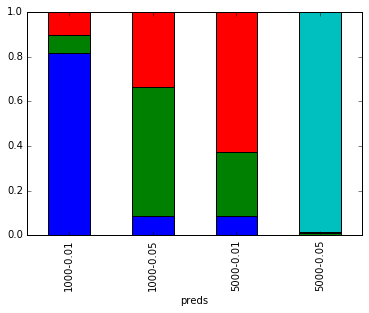

In [311]:
df = dat
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

train, test = df[df['is_train']==True], df[df['is_train']==False]

## cols 4:34 are abundances
## Cols 34:94 are pi
## cols 64:94 are dxy
## cols 94:194 are 2d hist
features = df.columns[34:94]

## Including the abundances increases the classifier but i think it's
## cheating because the abundance values are not uncorrelated.
#features = df.columns[4:94]
## Including nspecies _really_ increases the classifier, but i think
## its obviously cheating.
#features = df.columns[3:94]

# If you want to use 2d histogram and pretend you know the SAD as data
features = features.union(df.columns[4:34])

clf = RandomForestClassifier(n_jobs=2)

## Turn the different combinations of K and c into categoricals
## i.e. 0 = 1000/0.01, 1 = 1000/0.05, etc
y, _ = pd.factorize(train["K"]+train["C"])
clf.fit(train[features], y)

ks = pd.factorize(df["K"]+"-"+df["C"])
preds = ks[1][clf.predict(test[features])]
dat_full = pd.crosstab(test['K']+"-"+test["C"], preds, rownames=['actual'], colnames=['preds'])
print(dat_full)
# Normalize the bins
labels = set(test['K']+"-"+test["C"])
for lab in labels:
    dat_full[lab] = dat_full[lab]/np.sum(dat_full[lab])

dat_full.T.plot.bar(stacked=True, legend=False)


In [292]:
obs_pis = [0, 0, 0, 0, 0, 0, 0, 0, 0.00018996960486322188, 0.0002517940324814302, 0.0005555555555555556, 0.0007598784194528875, 0.0008557400046761748, 0.0009231479344564966, 0.000966183574879227, 0.0010131712259371832, 0.0011675423234092236, 0.001519756838905775, 0.001519756838905775, 0.0020164094006396888, 0.002135874476300008, 0.0022032781484227, 0.002300437083045779, 0.002336937565399372, 0.0024393198537509364, 0.0025551684088269454, 0.002853421003659824, 0.0030393335773165327, 0.003258078297161152, 0.0032949331747638244, 0.0034056712138903922, 0.003766765299023363, 0.004015658712767641, 0.004602131601026757, 0.004638742774096721, 0.0048969942586963855, 0.0054036363884719186, 0.006258111210941404, 0.0070523415977961435, 0.008301430299580163, 0.008680555555555554, 0.010638297872340425, 0.0110062893081761, 0.011125703334390787, 0.016522484607590992, 0.017512189823658986, 0.02089665653495441, 0.021276595744680844, 0.02161821630422097, 0.023246941966241903, 0.02608959428856512, 0.02770571197319974, 0.028498798299131076, 0.029174208515440194, 0.03199260286638926, 0.036923076923076927, 0.03875430736898448]
obs_pis.reverse()
pred = ks[1][clf.predict(np.array(obs_pis[:len(features)]).reshape(1, -1))]
print(pred)

ValueError: Number of features of the model must  match the input. Model n_features is 100 and  input n_features is 57 

## Lets look at the feature component importance


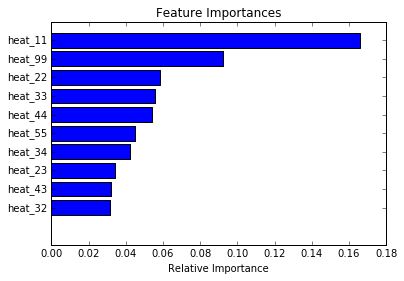

In [291]:
## Choose the number of features to examine
nfeatures = 10

## Get the importances. This is a list of floats representing
## the fraction of the model that each feature captures.
importances = clf.feature_importances_
## Argsort calculates the index of each list element that would
## result in a sorted list. x[np.argsort(x)] results in a sorted list.
indices = np.argsort(importances)
## This does a couple things. Makes tuples of indices and importance values.
## also results in a sorted list.
ranked = [(indices[x], importances[indices[x]]) for x in xrange(0, len(indices))]

## Subsample to only report the x most important features.
ranked = ranked[-nfeatures:]

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(ranked)), [x[1] for x in ranked], color='b', align='center')
plt.yticks(range(len(ranked)), features[[x[0] for x in ranked]])
#plt.barh(range(len(indices)), importances[indices], color='b', align='center')
#plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')


## This is the example code I found and modified
From here: http://blog.yhat.com/posts/random-forests-in-python.html

and here: http://www.agcross.com/2015/02/random-forests-in-python-with-scikit-learn/

In [ ]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

train, test = df[df['is_train']==True], df[df['is_train']==False]

features = df.columns[:4]
clf = RandomForestClassifier(n_jobs=2)
y, _ = pd.factorize(train['species'])
clf.fit(train[features], y)

preds = iris.target_names[clf.predict(test[features])]
pd.crosstab(test['species'], preds, rownames=['actual'], colnames=['preds'])

# This is for testing

In [172]:
dat = pd.crosstab(test['K']+"-"+test["C"], preds, rownames=['actual'], colnames=['preds'])
labels = set(test['K']+"-"+test["C"])

In [185]:
labels = set(test['K']+"-"+test["C"])
for lab in labels:
    dat[lab] = dat[lab]/np.sum(dat[lab])
    print(dat[lab])
print(dat)

actual
1000-0.01    0.509881
1000-0.05    0.233202
5000-0.01    0.249012
5000-0.05    0.007905
Name: 1000-0.01, dtype: float64
actual
1000-0.01    0.223464
1000-0.05    0.262570
5000-0.01    0.486034
5000-0.05    0.027933
Name: 5000-0.01, dtype: float64
actual
1000-0.01    0.127193
1000-0.05    0.456140
5000-0.01    0.324561
5000-0.05    0.092105
Name: 1000-0.05, dtype: float64
actual
1000-0.01    0.009132
1000-0.05    0.077626
5000-0.01    0.031963
5000-0.05    0.881279
Name: 5000-0.05, dtype: float64
preds      1000-0.01  1000-0.05  5000-0.01  5000-0.05
actual                                               
1000-0.01   0.509881   0.127193   0.223464   0.009132
1000-0.05   0.233202   0.456140   0.262570   0.077626
5000-0.01   0.249012   0.324561   0.486034   0.031963
5000-0.05   0.007905   0.092105   0.027933   0.881279


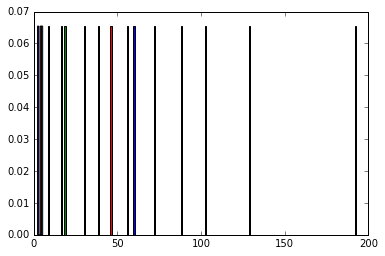

preds      1000-0.01  1000-0.05  5000-0.01  5000-0.05
actual                                               
1000-0.01   0.509881   0.127193   0.223464   0.009132
1000-0.05   0.233202   0.456140   0.262570   0.077626
5000-0.01   0.249012   0.324561   0.486034   0.031963
5000-0.05   0.007905   0.092105   0.027933   0.881279


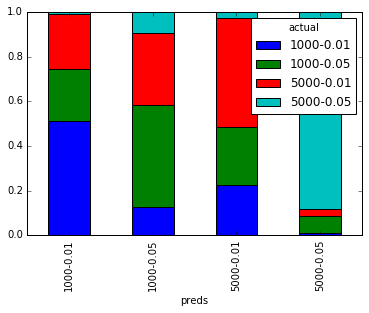

In [191]:
dat.T.plot.bar(stacked=True, legend=True)
print(dat)